In [1]:
import glob
import json
import gzip
import dill as pickle
import pandas as pd

In [2]:
from truthnet.util import validate
from truthnet.util import calculate_response_parallel

In [3]:
def getresveritas(row):
    with open('../../veritas-experiment3/veritas-experiment/'+row.jsonpath, 'r') as file:
        data = json.load(file)
    return data[0]['veritas']
def getreskappa(row):
    with open('../../veritas-experiment3/veritas-experiment/'+row.jsonpath, 'r') as file:
        data = json.load(file)
    return data[0]['lower_threshold']
def getresmu(row):
    with open('../../veritas-experiment3/veritas-experiment/'+row.jsonpath, 'r') as file:
        data = json.load(file)
    return data[0]['score']
def getres(row):
    with open('../../veritas-experiment3/veritas-experiment/'+row.jsonpath, 'r') as file:
        data = json.load(file)
    return data[0]['responses']
def getsex(row):
    return row.Sex=='Male'
def getethnicity(row):
    if row['Ethnicity simplified'] == 'White':
        return 0
    if row['Ethnicity simplified'] == 'Black':
        return 1
    if row['Ethnicity simplified'] == 'Asian':
        return 2
    if row['Ethnicity simplified'] == 'Mixed':
        return 3
    return 4

def getpklresp(df):
    A=[{k:v} for k,v in ddf['response'].to_dict().items()]
    with gzip.open('../../response_jsons/experiment3-json.pkl.gz','wb') as file:
        pickle.dump(A,file)

filetimes=pd.read_csv('../../veritas-experiment3/filetimes.csv',header=None,sep=' ').dropna(axis=1)
filetimes.columns=['sz','creation','jsonpath']
filetimes.creation = pd.to_datetime(filetimes.creation)
filetimes=filetimes.set_index('creation')
filetimes=filetimes.sort_index().tail(19)
filetimes=filetimes.reset_index()
filetimes['jsonpath'] = [x.split('/')[-1] for x in filetimes.jsonpath.values]


In [4]:
filetimes

,creation,sz,jsonpath
0,2024-01-19 22:41:56+00:00,470,predictions_0aec9e08-9a5b-46ad-bbbe-d14ad81ee2...
1,2024-01-20 02:08:18+00:00,482,predictions_d22a76c7-44b2-4c63-9ea5-a008311dfc...
2,2024-01-23 14:38:11+00:00,485,predictions_fa500846-a86d-440f-a2ab-8f38af52aa...
3,2024-01-26 00:02:35+00:00,504,predictions_3f37900c-b148-436a-a6f3-05ce311040...
4,2024-01-28 16:13:54+00:00,500,predictions_84f4d886-1f81-43ab-85a0-72a48299b3...
5,2024-01-28 16:38:04+00:00,484,predictions_8f98b0f4-1817-4ec2-a05d-909613c428...
6,2024-01-28 16:46:41+00:00,484,predictions_ad32a2f9-9e61-492c-9067-17bc7e00f7...
7,2024-01-28 17:18:52+00:00,494,predictions_d36f06e8-56f9-4b33-8e7a-731377a300...
8,2024-01-28 17:59:40+00:00,481,predictions_198494fc-5bc7-4beb-9ea6-b0f4a1b582...
9,2024-01-28 18:04:51+00:00,497,predictions_5ecaa903-6aa4-47a5-a819-06b661eecd...


In [5]:
file=filetimes.jsonpath.values[0]
file




'predictions_0aec9e08-9a5b-46ad-bbbe-d14ad81ee23d.json'

In [6]:
ddf=filetimes.copy()

ddf['veritas']=ddf.apply(getresveritas,axis=1)
ddf['kappa']=ddf.apply(getreskappa,axis=1)
ddf['score']=ddf.apply(getresmu,axis=1)
#ddf['sex']=ddf.apply(getsex,axis=1)
#ddf['ethnicity']=ddf.apply(getethnicity,axis=1)
#ddf['Age']=ddf.Age.astype(float)
ddf['response'] = ddf.apply(getres,axis=1)
getpklresp(ddf)

In [8]:
calculate_response_parallel('../../response_jsons/experiment3-json.pkl.gz','../../veritas_models/veritas_002.pkl.gz','../../data/res_exp3_model2_psych.csv')

ckeck passed


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:23<00:00,  1.22s/it]


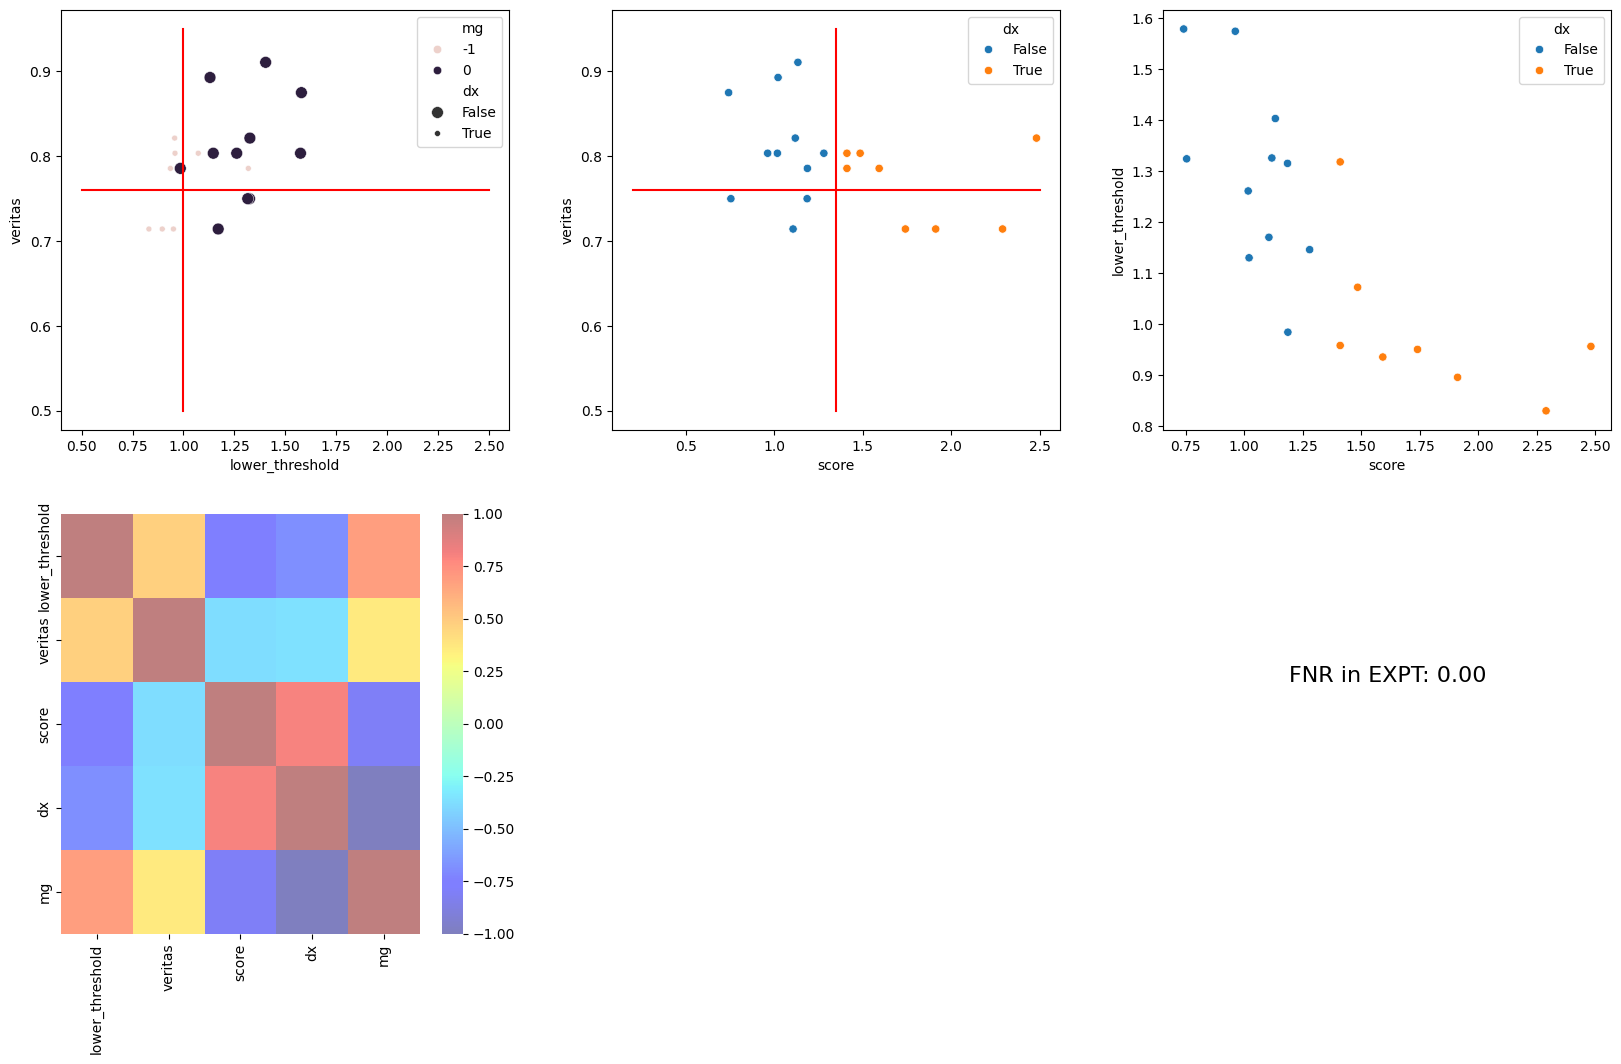

In [9]:
import pandas as pd
resf=pd.read_csv('../../data/res_exp3_model2_psych.csv',index_col=0).T
resf.columns=['lower_threshold','veritas','score']
expd3,expf3=validate(resf,C0=1,C1=0.76,C2=1.35,DX=False,score=True,
         outfile='exptvalid3.png',
         validation_type='fnrexpt')

In [10]:
expd3

{'fnr': 0.0}

In [13]:
expf3

,lower_threshold,veritas,score,dx,mg
1,1.403637,0.910714,1.133364,False,0
7,1.324599,0.750000,0.754771,False,0
5,0.950780,0.714286,1.740385,True,-1
0,1.170680,0.714286,1.105971,False,0
2,0.935854,0.785714,1.592204,True,-1
9,0.984557,0.785714,1.186922,False,0
3,0.958489,0.803571,1.410198,True,-1
8,1.130457,0.892857,1.021263,False,0
6,0.830332,0.714286,2.289181,True,-1
4,1.318546,0.785714,1.410319,True,-1


In [ ]:
resf=ddf.drop(['veritas','kappa','score'],axis=1).join(expf3)

In [ ]:
import seaborn as sns
sns.kdeplot(data=resf,x='score',y='lower_threshold',hue='Sex')

In [ ]:
sns.kdeplot(data=resf,x='veritas',y='lower_threshold')

In [ ]:
from scipy import stats
a=stats.t.ppf(0.95,len(resf.index.values) - 1)*stats.sem(resf['Time taken'])
resf['Time taken'].mean()/60+a/60,resf['Time taken'].mean()/60-a/60

In [ ]:
resf.groupby('mg').mean()

In [ ]:
resf.corr()

In [ ]:
resf.groupby(['Ethnicity simplified','Sex']).mean()

In [ ]:
resf.groupby(['Sex']).mean()

In [ ]:
ddf['Ethnicity simplified'].value_counts()